### Model 1

In [29]:
import pandas as pd

dataset = pd.read_csv("../training_data.csv", usecols = ['id','tweet','subtask_c'])
dataset.columns = ['id','tweet', 'target']
dataset.dropna(inplace = True)
dataset.reset_index(drop = True, inplace = True)
print(dataset.head(n = 5))
print(len(dataset.columns))
print(dataset.size)

      id                                              tweet target
0  90194  @USER @USER Go home you’re drunk!!! @USER #MAG...    IND
1  97670                  @USER Liberals are all Kookoo !!!    OTH
2  52415  @USER was literally just talking about this lo...    GRP
3  13384  @USER Canada doesn’t need another CUCK! We alr...    IND
4  28414  @USER you are a lying corrupt traitor!!! Nobod...    IND
3
11640


In [30]:

print(dataset.target.unique())

# Very Very disturbing error in the dataset. Thank god, I found it.
dataset = dataset.drop(dataset[(dataset.target != 'IND') & (dataset.target != 'GRP') & (dataset.target != 'OTH')].index)
# print(dataset[dataset.sentiment == 'NOT'])
# print(dataset.sentiment.unique())
print(dataset.target.value_counts())
print(len(dataset))

['IND' 'OTH' 'GRP' 'NOT'
 ' called for\xa0imposing the death penalty on alleged teen rapists. ... URL'
 'OFF']
IND    2407
GRP    1072
OTH     395
Name: target, dtype: int64
3874


In [31]:
# dataset.drop(columns=['sentiment'], inplace=True)
# dataset.head(n=10)


print(dataset[dataset.target == 'IND'].head(n=10))

print(dataset[dataset.target == 'GRP'].head(n=10))

print(dataset[dataset.target == 'OTH'].head(n=10))

       id                                              tweet target
0   90194  @USER @USER Go home you’re drunk!!! @USER #MAG...    IND
3   13384  @USER Canada doesn’t need another CUCK! We alr...    IND
4   28414  @USER you are a lying corrupt traitor!!! Nobod...    IND
6   56117  @USER @USER @USER @USER LOL!!!   Throwing the ...    IND
9   77665  @USER Tbh these days i just don't like people ...    IND
11  12108  @USER @USER @USER @USER @USER @USER @USER @USE...    IND
14  98992                                     @USER Fuck off    IND
16  75215  @USER @USER She is useless.  Attempts to do th...    IND
17  57013  @USER Grateful Trump doesn’t have a dog in the...    IND
18  74831           @USER Trump kicks dem butt - its so fun.    IND
       id                                              tweet target
2   52415  @USER was literally just talking about this lo...    GRP
7   12681  @USER @USER Kind of like when conservatives wa...    GRP
8   82904  @USER @USER Da fuck is going on peopl

In [6]:
imperium_dataset = pd.read_csv("../finaltask_b.csv", usecols = ['Tweets','id','subtask_b'])
imperium_dataset.columns = ['tweet', 'id', 'target']
imperium_dataset.head(n=10)


imperium_dataset = imperium_dataset[['id', 'tweet', 'target']]
imperium_dataset.head(n=10)
print(imperium_dataset.target.value_counts())

TIN    4921
UNT    3354
Name: target, dtype: int64


In [7]:
dataset = dataset.append(imperium_dataset, sort=False)
print(dataset.target.value_counts())

dataset = imperium_dataset
print(dataset.count())

TIN    8795
UNT    3878
Name: target, dtype: int64
id        4400
tweet     8275
target    8275
dtype: int64


c:\users\dyanesh\anaconda3\envs\deep_learning\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [3]:
import preprocess as pp

In [23]:
clean_tweet = pp.clean_HTML(dataset.tweet)
clean_tweet = pp.clean_emoticons(clean_tweet)
clean_tweet = pp.clean_emojis(clean_tweet)
clean_tweet = pp.clean_tokens(clean_tweet)
clean_tweet = pp.clean_mentions(clean_tweet)
clean_tweet = pp.clean_hashtags(clean_tweet)
clean_tweet = pp.expand_contractions(clean_tweet)
clean_tweet = pp.lemmatize(clean_tweet)
#clean_tweet = pp.remove_stop_words(clean_tweet)
clean_tweet = pp.clean_censored_words(clean_tweet)
clean_tweet = pp.remove_punctuators(clean_tweet)

Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [32]:
dataset['clean_tweet'] = clean_tweet
# dataset.drop(columns = ['sentiment'], inplace = True)
dataset.head(n=10)

,id,tweet,target,clean_tweet
0,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,IND,go home you be drunk maga trump 2020
1,97670,@USER Liberals are all Kookoo !!!,OTH,liberals be all kookoo
2,52415,@USER was literally just talking about this lo...,GRP,be literally just talk about this lol all mass...
3,13384,@USER Canada doesn’t need another CUCK! We alr...,IND,canada do not need another cuck we already hav...
4,28414,@USER you are a lying corrupt traitor!!! Nobod...,IND,you be a lie corrupt traitor nobody want to he...
5,28195,@USER @USER @USER gun control! That is all the...,OTH,gun control that be all these kid be ask for
6,56117,@USER @USER @USER @USER LOL!!! Throwing the ...,IND,lol throwing the bullshit flag on such nonsens...
7,12681,@USER @USER Kind of like when conservatives wa...,GRP,kind of like when conservative wanna associate...
8,82904,@USER @USER Da fuck is going on people? Ther...,GRP,da fuck be go on people theres the mens room a...
9,77665,@USER Tbh these days i just don't like people ...,IND,tbh these day i just do not like people in gen...


In [11]:
import numpy as np

def encode_labels(labels):
    encoded_labels = []
    for label in labels:
        if label == 'IND':
            encoded_labels.append(0)
        elif label == 'GRP':
            encoded_labels.append(1)
        else :
            encoded_labels.append(2)
    return np.asarray(encoded_labels)

In [33]:
dataset['label'] = encode_labels(dataset.target)

In [34]:
dataset.head(n=10)

,id,tweet,target,clean_tweet,label
0,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,IND,go home you be drunk maga trump 2020,0
1,97670,@USER Liberals are all Kookoo !!!,OTH,liberals be all kookoo,2
2,52415,@USER was literally just talking about this lo...,GRP,be literally just talk about this lol all mass...,1
3,13384,@USER Canada doesn’t need another CUCK! We alr...,IND,canada do not need another cuck we already hav...,0
4,28414,@USER you are a lying corrupt traitor!!! Nobod...,IND,you be a lie corrupt traitor nobody want to he...,0
5,28195,@USER @USER @USER gun control! That is all the...,OTH,gun control that be all these kid be ask for,2
6,56117,@USER @USER @USER @USER LOL!!! Throwing the ...,IND,lol throwing the bullshit flag on such nonsens...,0
7,12681,@USER @USER Kind of like when conservatives wa...,GRP,kind of like when conservative wanna associate...,1
8,82904,@USER @USER Da fuck is going on people? Ther...,GRP,da fuck be go on people theres the mens room a...,1
9,77665,@USER Tbh these days i just don't like people ...,IND,tbh these day i just do not like people in gen...,0


In [43]:
# Splitting the data according to our needs.

length = len(dataset[dataset.label == 2])
new_dataset_0 = dataset[dataset.label == 0].head(length*3)
print(new_dataset_0.info())
new_dataset_1 = dataset[dataset.label == 1].head(length*2)

new_dataset_2 = dataset[dataset.label == 2]
print(new_dataset_1.info())
# print(dataset[dataset.label == 2])
print(new_dataset_2.info())

new_dataset = new_dataset_0.append(new_dataset_1.append(new_dataset_2))

# new_dataset = new_dataset_0 + new_dataset_1 + new_dataset_2

# dataset = new_dataset
print(new_dataset.target.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1930
Data columns (total 5 columns):
id             1185 non-null int64
tweet          1185 non-null object
target         1185 non-null object
clean_tweet    1185 non-null object
label          1185 non-null int32
dtypes: int32(1), int64(1), object(3)
memory usage: 50.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 790 entries, 2 to 2896
Data columns (total 5 columns):
id             790 non-null int64
tweet          790 non-null object
target         790 non-null object
clean_tweet    790 non-null object
label          790 non-null int32
dtypes: int32(1), int64(1), object(3)
memory usage: 33.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 1 to 3879
Data columns (total 5 columns):
id             395 non-null int64
tweet          395 non-null object
target         395 non-null object
clean_tweet    395 non-null object
label          395 non-null int32
dtypes: int32(1), int64(1), 

In [44]:
dataset = new_dataset

In [106]:
from sklearn.model_selection import train_test_split
import keras
seed = 2000

X = dataset.clean_tweet
y = dataset.label

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=.2, random_state=seed)
max_len = max([len(x.split()) for x in X_train])
print(max_len)

# X_train, X_validation_and_test, y_train, y_validation_and_test = train_test_split(X, y, test_size=.2, random_state=seed)

# X_validation, X_test, y_validation, y_test = train_test_split(X_validation_and_test, y_validation_and_test, test_size=.5, random_state=seed)



y_train=keras.utils.to_categorical(y_train)
y_validation=keras.utils.to_categorical(y_validation)
y_test=keras.utils.to_categorical(y_test)

62


In [47]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
import gensim
from gensim.models.word2vec import Word2Vec
from gensim.models.doc2vec import TaggedDocument
import multiprocessing
from sklearn import utils

c:\users\dyanesh\anaconda3\envs\deep_learning\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [48]:
def labelize_tweets_ug(tweets,label):
    result = []
    prefix = label
    for i, t in zip(tweets.index, tweets):
        result.append(TaggedDocument(t.split(), [prefix + '_%s' % i]))
    return result

In [107]:
all_x = pd.concat([X_train, X_validation])
all_x_w2v = labelize_tweets_ug(all_x, 'all')

In [108]:
cores = multiprocessing.cpu_count()
model_ug_cbow = Word2Vec(sg=0, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_cbow.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████████████████████████████████████████████████████████████████████| 2370/2370 [00:00<00:00, 151948.95it/s]


In [109]:
for epoch in range(30):
    model_ug_cbow.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_cbow.alpha -= 0.002
    model_ug_cbow.min_alpha = model_ug_cbow.alpha

100%|█████████████████████████████████████████████████████████████████████████| 2370/2370 [00:00<00:00, 2332355.81it/s]


In [110]:
model_ug_sg = Word2Vec(sg=1, size=100, negative=5, window=2, min_count=2, workers=cores, alpha=0.065, min_alpha=0.065)
model_ug_sg.build_vocab([x.words for x in tqdm(all_x_w2v)])

100%|██████████████████████████████████████████████████████████████████████████████████████| 2370/2370 [00:00<?, ?it/s]


In [111]:
%%time
for epoch in range(30):
    model_ug_sg.train(utils.shuffle([x.words for x in tqdm(all_x_w2v)]), total_examples=len(all_x_w2v), epochs=1)
    model_ug_sg.alpha -= 0.002
    model_ug_sg.min_alpha = model_ug_sg.alpha


100%|██████████████████████████████████████████████████████████████████████████████████████| 2370/2370 [00:00<?, ?it/s]


Wall time: 2.09 s


In [112]:
model_ug_cbow.save('w2v_model_ug_cbow.word2vec')
model_ug_sg.save('w2v_model_ug_sg.word2vec')

In [113]:
from gensim.models import KeyedVectors
model_ug_cbow = KeyedVectors.load('w2v_model_ug_cbow.word2vec')
model_ug_sg = KeyedVectors.load('w2v_model_ug_sg.word2vec')

In [114]:
embeddings_index = {}
for w in model_ug_cbow.wv.vocab.keys():
    embeddings_index[w] = np.append(model_ug_cbow.wv[w],model_ug_sg.wv[w])
print('Found %s word vectors.' % len(embeddings_index))

Found 2941 word vectors.


In [115]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

In [116]:
max_len = max([len(x.split()) for x in X_train])
X_train_seq = pad_sequences(sequences, maxlen=max_len)
sequences_val = tokenizer.texts_to_sequences(X_validation)
X_val_seq = pad_sequences(sequences_val, maxlen=max_len)

In [117]:
num_words = 20000
embedding_dim = 200
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers import Input, Dense, concatenate, Activation
from keras.models import Model

In [118]:
tweet_input = Input(shape=(max_len,), dtype='int32')

tweet_encoder = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(3)(merged)



# model = Sequential()
# model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True))
# model.add(Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1))
# model.add(GlobalMaxPooling1D())


# output = Dense(256,activation='relu')(bigram_branch)
# output = Dropout(0.2)(output)
# output = Dense(3)(output)
output = Activation('softmax')(merged)

# model.add(Dense(256,activation='relu'))
# model.add(Dense(3,input_shape=(1,),activation='softmax'))






model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






# inputs = Input(shape=(max_len, ))
# embedding_layer = Embedding(num_words,embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(inputs)
# x = Flatten()(embedding_layer)
# x = Dense(32, activation='relu')(x)

# predictions = Dense(3, activation='softmax')(x)
# model = Model(inputs=[inputs], outputs=predictions)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# model.summary()




__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 62)           0                                            
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 62, 200)      4000000     input_12[0][0]                   
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 61, 100)      40100       embedding_15[0][0]               
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 60, 100)      60100       embedding_15[0][0]               
__________________________________________________________________________________________________
conv1d_34 

In [119]:
from keras.callbacks import ModelCheckpoint

seed = 42
np.random.seed(seed)

filepath="CNN_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history=model.fit(X_train_seq, y_train, batch_size=32,shuffle=True, epochs=10, validation_data = (X_val_seq,y_validation), callbacks = [checkpoint])

Train on 1896 samples, validate on 474 samples
Epoch 1/10
1896/1896 [==============================] - ETA: 1:08 - loss: 1.3435 - acc: 0.375 - ETA: 23s - loss: 1.3088 - acc: 0.437 - ETA: 14s - loss: 1.4277 - acc: 0.46 - ETA: 10s - loss: 1.3788 - acc: 0.50 - ETA: 7s - loss: 1.2933 - acc: 0.5035 - ETA: 6s - loss: 1.2710 - acc: 0.497 - ETA: 5s - loss: 1.2618 - acc: 0.488 - ETA: 4s - loss: 1.2254 - acc: 0.493 - ETA: 4s - loss: 1.2048 - acc: 0.498 - ETA: 3s - loss: 1.1626 - acc: 0.516 - ETA: 3s - loss: 1.1718 - acc: 0.516 - ETA: 2s - loss: 1.1544 - acc: 0.517 - ETA: 2s - loss: 1.1313 - acc: 0.522 - ETA: 2s - loss: 1.1274 - acc: 0.518 - ETA: 2s - loss: 1.1061 - acc: 0.523 - ETA: 1s - loss: 1.0854 - acc: 0.528 - ETA: 1s - loss: 1.0782 - acc: 0.530 - ETA: 1s - loss: 1.0720 - acc: 0.534 - ETA: 1s - loss: 1.0668 - acc: 0.536 - ETA: 1s - loss: 1.0489 - acc: 0.546 - ETA: 0s - loss: 1.0409 - acc: 0.546 - ETA: 0s - loss: 1.0305 - acc: 0.551 - ETA: 0s - loss: 1.0351 - acc: 0.546 - ETA: 0s - loss: 1.0

1896/1896 [==============================] - ETA: 1s - loss: 0.0171 - acc: 1.000 - ETA: 1s - loss: 0.0232 - acc: 1.000 - ETA: 1s - loss: 0.0207 - acc: 1.000 - ETA: 1s - loss: 0.0216 - acc: 1.000 - ETA: 1s - loss: 0.0215 - acc: 1.000 - ETA: 1s - loss: 0.0209 - acc: 1.000 - ETA: 1s - loss: 0.0203 - acc: 1.000 - ETA: 1s - loss: 0.0197 - acc: 1.000 - ETA: 1s - loss: 0.0195 - acc: 1.000 - ETA: 1s - loss: 0.0193 - acc: 1.000 - ETA: 1s - loss: 0.0206 - acc: 0.998 - ETA: 1s - loss: 0.0201 - acc: 0.998 - ETA: 0s - loss: 0.0209 - acc: 0.998 - ETA: 0s - loss: 0.0211 - acc: 0.997 - ETA: 0s - loss: 0.0213 - acc: 0.997 - ETA: 0s - loss: 0.0206 - acc: 0.998 - ETA: 0s - loss: 0.0206 - acc: 0.998 - ETA: 0s - loss: 0.0205 - acc: 0.998 - ETA: 0s - loss: 0.0198 - acc: 0.998 - ETA: 0s - loss: 0.0193 - acc: 0.998 - ETA: 0s - loss: 0.0191 - acc: 0.998 - ETA: 0s - loss: 0.0188 - acc: 0.998 - ETA: 0s - loss: 0.0187 - acc: 0.998 - ETA: 0s - loss: 0.0184 - acc: 0.998 - ETA: 0s - loss: 0.0181 - acc: 0.998 - ETA: 

In [120]:
from keras.models import load_model
loaded_CNN_model = load_model('CNN_best_weights.03-0.6245.hdf5')

In [121]:


############# USE THIS AFTER YOU GET THE TEST DATA #####################


import pandas as pd
test_dataset = pd.read_csv("test_set_taskc.tsv", usecols = ['id','tweet'], sep='\t')
test_dataset.dropna(inplace = True)
test_dataset.reset_index(drop = True, inplace = True)
print(test_dataset.count())
print(test_dataset.info())
print(test_dataset.head())

id       213
tweet    213
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 2 columns):
id       213 non-null int64
tweet    213 non-null object
dtypes: int64(1), object(1)
memory usage: 3.4+ KB
None
      id                                              tweet
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1  60133  #NoPasaran: Unity demo to oppose the far-right...
2  83681           . . . What the fuck did he do this time?
3  65507  @USER Do you get the feeling he is kissing @US...
4  34263  #StopKavanaugh he is liar like the rest of the...


In [122]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


#################  USE THIS AFTER YOU GET THE TEST DATA #####################


X_test = test_dataset.tweet
#y_test = encode_labels(test_dataset.sentiment)
X_test = pp.clean_HTML(X_test)
X_test = pp.clean_emoticons(X_test)
X_test = pp.clean_emojis(X_test)
X_test = pp.clean_tokens(X_test)
X_test = pp.clean_mentions(X_test)
X_test = pp.clean_hashtags(X_test)
X_test = pp.expand_contractions(X_test)
X_test = pp.lemmatize(X_test)
# X_test = pp.remove_stop_words(X_test)
X_test = pp.clean_censored_words(X_test)
X_test = pp.remove_punctuators(X_test)

Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [124]:


sequences_test = tokenizer.texts_to_sequences(X_test)
X_test_seq = pad_sequences(sequences_test, maxlen=max_len)

In [127]:

yhat_cnn = loaded_CNN_model.predict(X_test_seq)
y_pred = np.argmax(yhat_cnn, axis=1)
test_dataset['prediction'] = y_pred
print(test_dataset.prediction.value_counts())

1    106
0    103
2      4
Name: prediction, dtype: int64


In [91]:
###### USING OUR TEST DATA #######
#sequences_test = tokenizer.texts_to_sequences(X_test)
#X_test_seq = pad_sequences(sequences_test, maxlen=max_len)

y_test = keras.utils.to_categorical(y_test)
loaded_CNN_model.evaluate(x=X_test_seq, y=y_test)

237/237 [==============================] - ETA:  - 0s 2ms/step


[0.9175746481126874, 0.6413502119764497]

In [97]:
print(y_test[:5])
print(np.argmax(y_test,axis=1))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[0 0 0 2 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 2 1 1 2 2 1 0 0 0 1 1 2 2 1 1
 0 0 0 1 1 0 0 2 2 0 2 1 0 2 0 1 0 2 1 0 0 1 2 2 1 0 1 0 1 2 1 0 1 2 0 1 0
 2 1 1 0 1 1 1 1 0 0 2 1 0 0 0 1 0 1 1 1 1 0 2 1 2 0 0 1 1 1 0 0 0 2 0 0 0
 0 0 0 0 0 1 0 2 1 0 2 0 0 2 0 0 0 0 0 1 0 0 2 0 2 1 1 0 1 0 2 0 2 0 0 2 0
 2 1 0 2 2 1 2 0 1 2 2 0 0 1 1 0 0 0 1 0 1 0 0 1 2 0 2 0 1 2 2 1 0 1 2 0 2
 1 2 0 0 0 1 0 0 2 1 0 0 1 0 0 0 2 1 1 0 1 0 0 2 2 0 0 1 0 2 2 0 1 2 0 0 1
 2 1 1 1 0 0 2 1 0 1 0 2 0 0 0]


In [98]:
from sklearn.metrics import f1_score
yhat_cnn = loaded_CNN_model.predict(X_test_seq)
f1_score(y_true=np.argmax(y_test,axis=1), y_pred=np.argmax(yhat_cnn,axis=1), average='macro')
#print(yhat_cnn[:10] > 0.5)
#print((y_test[:10]),(yhat_cnn[:10]))

0.5248952110144457

In [63]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [133]:

# y_pred = (yhat_cnn > 0.5)
decode = lambda x: "IND" if x == 0 else ("GRP" if x == 1 else "OTH") 

# if x<2 else (x**2 if x<4 else x+10)
test_dataset['predictions'] = np.array([decode(y) for y in y_pred])
print(test_dataset.predictions.value_counts())
# cn_matrix = confusion_matrix(y_test, y_pred)
# print(cn_matrix)

# plot_confusion_matrix(cn_matrix, ['UNTARGETED', 'TARGETED'])
print(test_dataset.head())

GRP    106
IND    103
OTH      4
Name: predictions, dtype: int64
      id                                              tweet  prediction  \
0  15923  #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...           1   
1  60133  #NoPasaran: Unity demo to oppose the far-right...           1   
2  83681           . . . What the fuck did he do this time?           0   
3  65507  @USER Do you get the feeling he is kissing @US...           0   
4  34263  #StopKavanaugh he is liar like the rest of the...           0   

  predictions  
0         GRP  
1         GRP  
2         IND  
3         IND  
4         IND  


In [134]:
test_dataset.drop(columns=['tweet','prediction'], inplace=True)
print(test_dataset.head())
print(test_dataset.count())

test_dataset.to_csv("Subtask_B_CNN_Word2Vec.csv", header = False, index = False)
# print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

      id predictions
0  15923         GRP
1  60133         GRP
2  83681         IND
3  65507         IND
4  34263         IND
id             213
predictions    213
dtype: int64


### Model 2

In [99]:
import os

# I am trying Google's pre-trained word embeddings. Let's see how it performs. I hope it does well.
model_ggl_w2v = gensim.models.KeyedVectors.load_word2vec_format("../Datasets/GoogleNews-vectors-negative300.bin", binary=True)  


In [100]:
ggl_embedding_index= {}

for w in model_ggl_w2v.vocab.keys():
    ggl_embedding_index[w] = model_ggl_w2v[w]

print("There are {number} words with that many vectors..".format(number=len(ggl_embedding_index)))

There are 3000000 words with that many vectors..


In [101]:
ggl_num_words = 30000
ggl_embedding_dimension = 300
ggl_embedding_matrix = np.zeros((ggl_num_words, ggl_embedding_dimension))
for word, i in tokenizer.word_index.items():
    if i >= ggl_num_words:
        continue
    embedding_vector = ggl_embedding_index.get(word)
    if embedding_vector is not None:
        ggl_embedding_matrix[i] = embedding_vector

In [103]:
tweet_input = Input(shape=(max_len,), dtype='int32')
tweet_encoder = Embedding(ggl_num_words, ggl_embedding_dimension, weights=[ggl_embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(3)(merged)
output = Activation('sigmoid')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()


'''
from keras.optimizers import Adam

tweet_input = Input(shape=(max_len,), dtype='int32')

tweet_encoder = Embedding(ggl_num_words, ggl_embedding_dimension, weights=[ggl_embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = GlobalMaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = GlobalMaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = GlobalMaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)

merged = Dense(256, activation='relu')(merged)
merged = Dropout(0.2)(merged)
merged = Dense(2)(merged)
output = Activation('softmax')(merged)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=1e-3),
                  metrics=['acc'])
model.summary()


'''


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 62)           0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 62, 300)      9000000     input_11[0][0]                   
__________________________________________________________________________________________________
conv1d_29 (Conv1D)              (None, 61, 100)      60100       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_30 (Conv1D)              (None, 60, 100)      90100       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_31 

"\nfrom keras.optimizers import Adam\n\ntweet_input = Input(shape=(max_len,), dtype='int32')\n\ntweet_encoder = Embedding(ggl_num_words, ggl_embedding_dimension, weights=[ggl_embedding_matrix], input_length=max_len, trainable=True)(tweet_input)\nbigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)\nbigram_branch = GlobalMaxPooling1D()(bigram_branch)\ntrigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)\ntrigram_branch = GlobalMaxPooling1D()(trigram_branch)\nfourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)\nfourgram_branch = GlobalMaxPooling1D()(fourgram_branch)\nmerged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)\n\nmerged = Dense(256, activation='relu')(merged)\nmerged = Dropout(0.2)(merged)\nmerged = Dense(2)(merged)\noutput = Activation('softmax')(merged)\nmodel = Model(in

In [104]:
filepath="CNN_ggl_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')

model.fit(X_train_seq, y_train, batch_size=32, epochs=10, validation_data=(X_val_seq, y_validation), callbacks = [checkpoint])

Train on 1896 samples, validate on 237 samples
Epoch 1/10
1896/1896 [==============================] - ETA: 2:21 - loss: 1.1164 - acc: 0.281 - ETA: 1:11 - loss: 1.1114 - acc: 0.250 - ETA: 47s - loss: 1.0828 - acc: 0.343 - ETA: 36s - loss: 1.0476 - acc: 0.37 - ETA: 29s - loss: 1.0466 - acc: 0.40 - ETA: 24s - loss: 1.0521 - acc: 0.40 - ETA: 20s - loss: 1.0386 - acc: 0.43 - ETA: 18s - loss: 1.0389 - acc: 0.43 - ETA: 16s - loss: 1.0359 - acc: 0.43 - ETA: 14s - loss: 1.0238 - acc: 0.45 - ETA: 13s - loss: 1.0336 - acc: 0.45 - ETA: 12s - loss: 1.0205 - acc: 0.46 - ETA: 11s - loss: 1.0262 - acc: 0.45 - ETA: 9s - loss: 1.0145 - acc: 0.4688 - ETA: 9s - loss: 1.0142 - acc: 0.468 - ETA: 8s - loss: 1.0115 - acc: 0.468 - ETA: 7s - loss: 1.0100 - acc: 0.474 - ETA: 7s - loss: 1.0085 - acc: 0.477 - ETA: 7s - loss: 1.0105 - acc: 0.478 - ETA: 6s - loss: 1.0125 - acc: 0.480 - ETA: 6s - loss: 1.0082 - acc: 0.485 - ETA: 5s - loss: 1.0053 - acc: 0.487 - ETA: 5s - loss: 0.9998 - acc: 0.492 - ETA: 5s - loss: 1

1896/1896 [==============================] - ETA: 3s - loss: 0.0946 - acc: 1.000 - ETA: 3s - loss: 0.1287 - acc: 0.984 - ETA: 3s - loss: 0.1073 - acc: 0.989 - ETA: 3s - loss: 0.1149 - acc: 0.984 - ETA: 3s - loss: 0.1056 - acc: 0.987 - ETA: 3s - loss: 0.1164 - acc: 0.979 - ETA: 3s - loss: 0.1156 - acc: 0.982 - ETA: 3s - loss: 0.1103 - acc: 0.984 - ETA: 2s - loss: 0.1085 - acc: 0.982 - ETA: 2s - loss: 0.1035 - acc: 0.984 - ETA: 2s - loss: 0.1001 - acc: 0.985 - ETA: 2s - loss: 0.0978 - acc: 0.987 - ETA: 2s - loss: 0.0981 - acc: 0.985 - ETA: 2s - loss: 0.1003 - acc: 0.984 - ETA: 2s - loss: 0.1028 - acc: 0.983 - ETA: 2s - loss: 0.1077 - acc: 0.980 - ETA: 2s - loss: 0.1038 - acc: 0.981 - ETA: 2s - loss: 0.0992 - acc: 0.982 - ETA: 2s - loss: 0.1011 - acc: 0.981 - ETA: 2s - loss: 0.1017 - acc: 0.979 - ETA: 2s - loss: 0.1011 - acc: 0.980 - ETA: 2s - loss: 0.1037 - acc: 0.980 - ETA: 2s - loss: 0.1033 - acc: 0.981 - ETA: 2s - loss: 0.1030 - acc: 0.981 - ETA: 2s - loss: 0.1003 - acc: 0.982 - ETA: 

1896/1896 [==============================] - ETA: 3s - loss: 8.5684e-04 - acc: 1.000 - ETA: 3s - loss: 0.0029 - acc: 1.0000    - ETA: 3s - loss: 0.0032 - acc: 1.000 - ETA: 3s - loss: 0.0033 - acc: 1.000 - ETA: 3s - loss: 0.0029 - acc: 1.000 - ETA: 3s - loss: 0.0027 - acc: 1.000 - ETA: 3s - loss: 0.0029 - acc: 1.000 - ETA: 3s - loss: 0.0029 - acc: 1.000 - ETA: 2s - loss: 0.0050 - acc: 1.000 - ETA: 2s - loss: 0.0048 - acc: 1.000 - ETA: 2s - loss: 0.0045 - acc: 1.000 - ETA: 2s - loss: 0.0047 - acc: 1.000 - ETA: 2s - loss: 0.0046 - acc: 1.000 - ETA: 2s - loss: 0.0045 - acc: 1.000 - ETA: 2s - loss: 0.0043 - acc: 1.000 - ETA: 2s - loss: 0.0042 - acc: 1.000 - ETA: 2s - loss: 0.0041 - acc: 1.000 - ETA: 2s - loss: 0.0041 - acc: 1.000 - ETA: 2s - loss: 0.0039 - acc: 1.000 - ETA: 2s - loss: 0.0038 - acc: 1.000 - ETA: 2s - loss: 0.0037 - acc: 1.000 - ETA: 2s - loss: 0.0036 - acc: 1.000 - ETA: 2s - loss: 0.0035 - acc: 1.000 - ETA: 2s - loss: 0.0035 - acc: 1.000 - ETA: 1s - loss: 0.0035 - acc: 1.000

1896/1896 [==============================] - ETA: 2s - loss: 9.3126e-04 - acc: 1.000 - ETA: 3s - loss: 0.0013 - acc: 1.0000    - ETA: 3s - loss: 0.0011 - acc: 1.000 - ETA: 3s - loss: 9.2909e-04 - acc: 1.000 - ETA: 3s - loss: 9.7651e-04 - acc: 1.000 - ETA: 3s - loss: 9.4563e-04 - acc: 1.000 - ETA: 3s - loss: 8.5760e-04 - acc: 1.000 - ETA: 3s - loss: 9.3056e-04 - acc: 1.000 - ETA: 2s - loss: 9.4113e-04 - acc: 1.000 - ETA: 2s - loss: 9.5808e-04 - acc: 1.000 - ETA: 2s - loss: 9.6583e-04 - acc: 1.000 - ETA: 2s - loss: 9.0528e-04 - acc: 1.000 - ETA: 2s - loss: 8.7832e-04 - acc: 1.000 - ETA: 2s - loss: 8.7828e-04 - acc: 1.000 - ETA: 2s - loss: 8.6623e-04 - acc: 1.000 - ETA: 2s - loss: 8.6854e-04 - acc: 1.000 - ETA: 2s - loss: 8.5449e-04 - acc: 1.000 - ETA: 2s - loss: 8.4871e-04 - acc: 1.000 - ETA: 2s - loss: 8.3552e-04 - acc: 1.000 - ETA: 2s - loss: 8.4250e-04 - acc: 1.000 - ETA: 2s - loss: 8.5180e-04 - acc: 1.000 - ETA: 2s - loss: 8.7145e-04 - acc: 1.000 - ETA: 2s - loss: 9.1788e-04 - acc: 1

In [139]:
from keras.models import load_model
loaded_CNN_model = load_model('CNN_ggl_best_weights.08-0.6287.hdf5')
#loaded_CNN_model.evaluate(x=X_test_seq, y=y_test)
yhat_cnn = loaded_CNN_model.predict(X_test_seq)
y_pred = np.argmax(yhat_cnn, axis=1)
# f1_score(y_true=np.argmax(y_test,axis=1), y_pred=np.argmax(yhat_cnn,axis=1), average='macro')
#(loaded_CNN_model.evaluate(x=X_test_seq, y=y_test))

In [141]:

# decode = lambda x: "INT" if x == 1 else "UNT"
test_dataset['predictions_ggl'] = np.array([decode(y) for y in y_pred])
#test_dataset.drop(columns=['tweet'], inplace=True)
print(test_dataset.head())
print(test_dataset.predictions_ggl.value_counts())

# test_dataset.to_csv("Subtask_B_CNN_GloVe.csv", header = False, index = False)

      id predictions predictions_ggl
0  15923         GRP             GRP
1  60133         GRP             GRP
2  83681         IND             IND
3  65507         IND             IND
4  34263         IND             IND
IND    112
GRP     86
OTH     15
Name: predictions_ggl, dtype: int64


In [29]:
decode = lambda x: "INT" if x == 1 else "UNT"
test_dataset['predictions'] = np.array([decode(y) for y in y_pred])

In [30]:
test_dataset['prob 0'] = yhat_cnn
test_dataset['prob 1'] = 1 - yhat_cnn

badwords = pd.read_csv("../badwords_list.csv")
badwordslist = badwords['Words']


for i in range(len(test_dataset)):
    if((test_dataset.loc[i,'prob 0']>=0.70) or test_dataset.loc[i,'prob 1']>=0.70):
        j=0
    else:
        line = test_dataset.loc[i,'tweet']
        if(line=="" or type(line)!=str):
            test_dataset.loc[i,"predictions"]='NOT'
            continue                       
        flag =False
        for word in badwordslist:
            if word in line.split():
                flag=True
                test_dataset.loc[i,"predictions"]='OFF'
                break
        if(flag==False):
            test_dataset.loc[i,"predictions"]='NOT'


In [31]:
y_pred = encode_labels(test_dataset['predictions'])

[[265  91]
 [100 372]]
Confusion matrix, without normalization
[[265  91]
 [100 372]]
0.7654060388497852


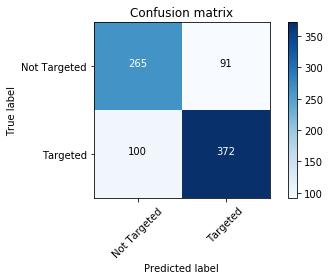

In [73]:
cn_matrix = confusion_matrix(y_test, y_pred)

print(cn_matrix)

plot_confusion_matrix(cn_matrix, ['Not Targeted', 'Targeted'])
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

[[623  56]
 [ 80 103]]
Confusion matrix, without normalization
[[623  56]
 [ 80 103]]
0.7519655385448667


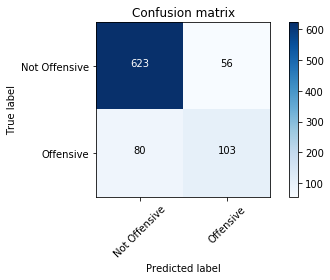

In [148]:
yhat_cnn = loaded_CNN_model.predict(X_test_seq)

y_pred = (yhat_cnn > 0.5)
test_dataset['label'] = y_pred
cn_matrix = confusion_matrix(y_test, y_pred)

print(cn_matrix)

plot_confusion_matrix(cn_matrix, ['Not Offensive', 'Offensive'])
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

In [142]:
test_result = test_dataset.copy()
test_result.drop(columns = ['predictions'], inplace = True)

    
# decode = lambda x: "OFF" if x == 1 else "NOT"
# test_result['label'] = np.array([decode(y) for y in y_pred])

# print(y_pred[:5])
print(test_result.head())
print(test_result.count())
test_result.to_csv("Subtask_C_CNN_GloVe.csv", header = False, index = False)

      id predictions_ggl
0  15923             GRP
1  60133             GRP
2  83681             IND
3  65507             IND
4  34263             IND
id                 213
predictions_ggl    213
dtype: int64


In [135]:
from keras.layers import LSTM, GRU, MaxPooling1D

tweet_input = Input(shape=(max_len,), dtype='int32')

tweet_encoder = Embedding(ggl_num_words, ggl_embedding_dimension, weights=[ggl_embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = MaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = MaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = MaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
lstm = LSTM(64)(merged)
lstm = Dropout(0.2)(lstm)
lstm = Dense(1)(lstm)
output = Activation('sigmoid')(lstm)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 57)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 57, 300)      9000000     input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 56, 100)      60100       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 55, 100)      90100       embedding_5[0][0]                
__________________________________________________________________________________________________
conv1d_15 

In [136]:
# filepath="CNN_LSTM_ggl_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
filepath="CNN_LSTM_ggl_best_weights_2.{epoch:02d}-{val_acc:.4f}.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')

model.fit(x_train_seq, y_train, batch_size=32, epochs=10, validation_split = 0.2, callbacks = [checkpoint])

Train on 10586 samples, validate on 2647 samples
Epoch 1/10
 6496/10586 [=================>............] - ETA: 25:10 - loss: 0.6950 - acc: 0.56 - ETA: 13:41 - loss: 0.7036 - acc: 0.53 - ETA: 9:46 - loss: 0.6913 - acc: 0.5625 - ETA: 7:51 - loss: 0.6929 - acc: 0.554 - ETA: 6:42 - loss: 0.6990 - acc: 0.537 - ETA: 5:57 - loss: 0.6963 - acc: 0.536 - ETA: 5:23 - loss: 0.6911 - acc: 0.558 - ETA: 4:57 - loss: 0.6872 - acc: 0.578 - ETA: 4:38 - loss: 0.6830 - acc: 0.593 - ETA: 4:23 - loss: 0.6825 - acc: 0.593 - ETA: 4:10 - loss: 0.6790 - acc: 0.605 - ETA: 3:58 - loss: 0.6735 - acc: 0.617 - ETA: 3:49 - loss: 0.6764 - acc: 0.610 - ETA: 3:42 - loss: 0.6687 - acc: 0.625 - ETA: 3:35 - loss: 0.6666 - acc: 0.631 - ETA: 3:30 - loss: 0.6662 - acc: 0.632 - ETA: 3:24 - loss: 0.6609 - acc: 0.637 - ETA: 3:19 - loss: 0.6571 - acc: 0.642 - ETA: 3:14 - loss: 0.6576 - acc: 0.643 - ETA: 3:11 - loss: 0.6607 - acc: 0.640 - ETA: 3:09 - loss: 0.6605 - acc: 0.639 - ETA: 3:05 - loss: 0.6609 - acc: 0.639 - ETA: 3:01 - 

 6560/10586 [=================>............] - ETA: 1:44 - loss: 0.4178 - acc: 0.781 - ETA: 1:54 - loss: 0.3728 - acc: 0.859 - ETA: 1:59 - loss: 0.3456 - acc: 0.895 - ETA: 2:06 - loss: 0.3693 - acc: 0.859 - ETA: 2:06 - loss: 0.3703 - acc: 0.850 - ETA: 2:07 - loss: 0.3605 - acc: 0.859 - ETA: 2:08 - loss: 0.3423 - acc: 0.866 - ETA: 2:08 - loss: 0.3630 - acc: 0.839 - ETA: 2:07 - loss: 0.3577 - acc: 0.840 - ETA: 2:07 - loss: 0.3571 - acc: 0.843 - ETA: 2:07 - loss: 0.3504 - acc: 0.849 - ETA: 2:06 - loss: 0.3515 - acc: 0.846 - ETA: 2:06 - loss: 0.3587 - acc: 0.843 - ETA: 2:05 - loss: 0.3507 - acc: 0.846 - ETA: 2:05 - loss: 0.3516 - acc: 0.845 - ETA: 2:05 - loss: 0.3483 - acc: 0.849 - ETA: 2:05 - loss: 0.3351 - acc: 0.856 - ETA: 2:04 - loss: 0.3400 - acc: 0.855 - ETA: 2:04 - loss: 0.3435 - acc: 0.855 - ETA: 2:04 - loss: 0.3424 - acc: 0.857 - ETA: 2:04 - loss: 0.3511 - acc: 0.852 - ETA: 2:05 - loss: 0.3493 - acc: 0.855 - ETA: 2:06 - loss: 0.3424 - acc: 0.858 - ETA: 2:06 - loss: 0.3382 - acc: 0

10586/10586 [==============================] - ETA: 50s - loss: 0.3461 - acc: 0.85 - ETA: 49s - loss: 0.3459 - acc: 0.85 - ETA: 49s - loss: 0.3462 - acc: 0.85 - ETA: 49s - loss: 0.3465 - acc: 0.85 - ETA: 48s - loss: 0.3473 - acc: 0.85 - ETA: 48s - loss: 0.3476 - acc: 0.85 - ETA: 47s - loss: 0.3486 - acc: 0.85 - ETA: 47s - loss: 0.3487 - acc: 0.85 - ETA: 47s - loss: 0.3483 - acc: 0.85 - ETA: 46s - loss: 0.3491 - acc: 0.85 - ETA: 46s - loss: 0.3490 - acc: 0.85 - ETA: 45s - loss: 0.3496 - acc: 0.85 - ETA: 45s - loss: 0.3494 - acc: 0.85 - ETA: 44s - loss: 0.3491 - acc: 0.85 - ETA: 44s - loss: 0.3489 - acc: 0.85 - ETA: 44s - loss: 0.3487 - acc: 0.85 - ETA: 43s - loss: 0.3485 - acc: 0.85 - ETA: 43s - loss: 0.3486 - acc: 0.85 - ETA: 42s - loss: 0.3481 - acc: 0.85 - ETA: 42s - loss: 0.3481 - acc: 0.85 - ETA: 42s - loss: 0.3482 - acc: 0.85 - ETA: 41s - loss: 0.3485 - acc: 0.85 - ETA: 41s - loss: 0.3483 - acc: 0.85 - ETA: 40s - loss: 0.3479 - acc: 0.85 - ETA: 40s - loss: 0.3489 - acc: 0.85 - ETA

 6560/10586 [=================>............] - ETA: 3:07 - loss: 0.1467 - acc: 0.937 - ETA: 2:39 - loss: 0.1038 - acc: 0.953 - ETA: 2:29 - loss: 0.0860 - acc: 0.968 - ETA: 2:24 - loss: 0.0767 - acc: 0.976 - ETA: 2:21 - loss: 0.0681 - acc: 0.981 - ETA: 2:18 - loss: 0.0669 - acc: 0.984 - ETA: 2:16 - loss: 0.0782 - acc: 0.977 - ETA: 2:15 - loss: 0.0813 - acc: 0.976 - ETA: 2:13 - loss: 0.0806 - acc: 0.979 - ETA: 2:12 - loss: 0.0778 - acc: 0.981 - ETA: 2:11 - loss: 0.0773 - acc: 0.980 - ETA: 2:10 - loss: 0.0728 - acc: 0.981 - ETA: 2:09 - loss: 0.0717 - acc: 0.983 - ETA: 2:08 - loss: 0.0699 - acc: 0.982 - ETA: 2:08 - loss: 0.0704 - acc: 0.983 - ETA: 2:07 - loss: 0.0721 - acc: 0.982 - ETA: 2:07 - loss: 0.0764 - acc: 0.979 - ETA: 2:07 - loss: 0.0763 - acc: 0.979 - ETA: 2:05 - loss: 0.0770 - acc: 0.977 - ETA: 2:06 - loss: 0.0754 - acc: 0.978 - ETA: 2:05 - loss: 0.0723 - acc: 0.979 - ETA: 2:05 - loss: 0.0737 - acc: 0.978 - ETA: 2:04 - loss: 0.0744 - acc: 0.976 - ETA: 2:03 - loss: 0.0736 - acc: 0

10586/10586 [==============================] - ETA: 49s - loss: 0.0768 - acc: 0.97 - ETA: 49s - loss: 0.0768 - acc: 0.97 - ETA: 48s - loss: 0.0767 - acc: 0.97 - ETA: 48s - loss: 0.0766 - acc: 0.97 - ETA: 48s - loss: 0.0764 - acc: 0.97 - ETA: 47s - loss: 0.0768 - acc: 0.97 - ETA: 47s - loss: 0.0765 - acc: 0.97 - ETA: 46s - loss: 0.0768 - acc: 0.97 - ETA: 46s - loss: 0.0765 - acc: 0.97 - ETA: 46s - loss: 0.0762 - acc: 0.97 - ETA: 45s - loss: 0.0760 - acc: 0.97 - ETA: 45s - loss: 0.0759 - acc: 0.97 - ETA: 44s - loss: 0.0758 - acc: 0.97 - ETA: 44s - loss: 0.0757 - acc: 0.97 - ETA: 44s - loss: 0.0755 - acc: 0.97 - ETA: 43s - loss: 0.0758 - acc: 0.97 - ETA: 43s - loss: 0.0762 - acc: 0.97 - ETA: 42s - loss: 0.0763 - acc: 0.97 - ETA: 42s - loss: 0.0772 - acc: 0.97 - ETA: 42s - loss: 0.0770 - acc: 0.97 - ETA: 41s - loss: 0.0769 - acc: 0.97 - ETA: 41s - loss: 0.0770 - acc: 0.97 - ETA: 40s - loss: 0.0768 - acc: 0.97 - ETA: 40s - loss: 0.0765 - acc: 0.97 - ETA: 40s - loss: 0.0764 - acc: 0.97 - ETA

 6592/10586 [=================>............] - ETA: 2:52 - loss: 0.0259 - acc: 1.000 - ETA: 2:34 - loss: 0.0214 - acc: 1.000 - ETA: 2:23 - loss: 0.0156 - acc: 1.000 - ETA: 2:21 - loss: 0.0168 - acc: 1.000 - ETA: 2:15 - loss: 0.0156 - acc: 1.000 - ETA: 2:14 - loss: 0.0143 - acc: 1.000 - ETA: 2:13 - loss: 0.0135 - acc: 1.000 - ETA: 2:13 - loss: 0.0185 - acc: 0.996 - ETA: 2:11 - loss: 0.0207 - acc: 0.993 - ETA: 2:10 - loss: 0.0191 - acc: 0.993 - ETA: 2:10 - loss: 0.0180 - acc: 0.994 - ETA: 2:09 - loss: 0.0217 - acc: 0.992 - ETA: 2:08 - loss: 0.0239 - acc: 0.990 - ETA: 2:09 - loss: 0.0229 - acc: 0.991 - ETA: 2:08 - loss: 0.0222 - acc: 0.991 - ETA: 2:08 - loss: 0.0286 - acc: 0.990 - ETA: 2:07 - loss: 0.0271 - acc: 0.990 - ETA: 2:07 - loss: 0.0258 - acc: 0.991 - ETA: 2:07 - loss: 0.0246 - acc: 0.991 - ETA: 2:06 - loss: 0.0253 - acc: 0.992 - ETA: 2:05 - loss: 0.0245 - acc: 0.992 - ETA: 2:04 - loss: 0.0238 - acc: 0.992 - ETA: 2:04 - loss: 0.0229 - acc: 0.993 - ETA: 2:04 - loss: 0.0249 - acc: 0

10586/10586 [==============================] - ETA: 47s - loss: 0.0235 - acc: 0.99 - ETA: 47s - loss: 0.0239 - acc: 0.99 - ETA: 46s - loss: 0.0240 - acc: 0.99 - ETA: 46s - loss: 0.0241 - acc: 0.99 - ETA: 46s - loss: 0.0243 - acc: 0.99 - ETA: 45s - loss: 0.0250 - acc: 0.99 - ETA: 45s - loss: 0.0256 - acc: 0.99 - ETA: 45s - loss: 0.0255 - acc: 0.99 - ETA: 44s - loss: 0.0254 - acc: 0.99 - ETA: 44s - loss: 0.0257 - acc: 0.99 - ETA: 43s - loss: 0.0259 - acc: 0.99 - ETA: 43s - loss: 0.0258 - acc: 0.99 - ETA: 43s - loss: 0.0257 - acc: 0.99 - ETA: 42s - loss: 0.0256 - acc: 0.99 - ETA: 42s - loss: 0.0255 - acc: 0.99 - ETA: 41s - loss: 0.0255 - acc: 0.99 - ETA: 41s - loss: 0.0256 - acc: 0.99 - ETA: 41s - loss: 0.0257 - acc: 0.99 - ETA: 40s - loss: 0.0256 - acc: 0.99 - ETA: 40s - loss: 0.0256 - acc: 0.99 - ETA: 39s - loss: 0.0255 - acc: 0.99 - ETA: 39s - loss: 0.0254 - acc: 0.99 - ETA: 39s - loss: 0.0254 - acc: 0.99 - ETA: 38s - loss: 0.0253 - acc: 0.99 - ETA: 38s - loss: 0.0253 - acc: 0.99 - ETA

 6560/10586 [=================>............] - ETA: 2:44 - loss: 0.0022 - acc: 1.000 - ETA: 2:40 - loss: 0.0194 - acc: 0.984 - ETA: 2:30 - loss: 0.0158 - acc: 0.989 - ETA: 2:22 - loss: 0.0147 - acc: 0.992 - ETA: 2:20 - loss: 0.0153 - acc: 0.993 - ETA: 2:18 - loss: 0.0134 - acc: 0.994 - ETA: 2:18 - loss: 0.0128 - acc: 0.995 - ETA: 2:16 - loss: 0.0177 - acc: 0.992 - ETA: 2:14 - loss: 0.0176 - acc: 0.993 - ETA: 2:14 - loss: 0.0162 - acc: 0.993 - ETA: 2:14 - loss: 0.0151 - acc: 0.994 - ETA: 2:13 - loss: 0.0142 - acc: 0.994 - ETA: 2:12 - loss: 0.0134 - acc: 0.995 - ETA: 2:11 - loss: 0.0136 - acc: 0.995 - ETA: 2:10 - loss: 0.0135 - acc: 0.995 - ETA: 2:09 - loss: 0.0129 - acc: 0.996 - ETA: 2:08 - loss: 0.0126 - acc: 0.996 - ETA: 2:08 - loss: 0.0120 - acc: 0.996 - ETA: 2:07 - loss: 0.0120 - acc: 0.996 - ETA: 2:07 - loss: 0.0147 - acc: 0.995 - ETA: 2:06 - loss: 0.0141 - acc: 0.995 - ETA: 2:06 - loss: 0.0150 - acc: 0.995 - ETA: 2:05 - loss: 0.0161 - acc: 0.994 - ETA: 2:04 - loss: 0.0161 - acc: 0

10586/10586 [==============================] - ETA: 50s - loss: 0.0160 - acc: 0.99 - ETA: 50s - loss: 0.0160 - acc: 0.99 - ETA: 49s - loss: 0.0159 - acc: 0.99 - ETA: 49s - loss: 0.0159 - acc: 0.99 - ETA: 48s - loss: 0.0158 - acc: 0.99 - ETA: 48s - loss: 0.0157 - acc: 0.99 - ETA: 48s - loss: 0.0157 - acc: 0.99 - ETA: 47s - loss: 0.0156 - acc: 0.99 - ETA: 47s - loss: 0.0156 - acc: 0.99 - ETA: 46s - loss: 0.0156 - acc: 0.99 - ETA: 46s - loss: 0.0156 - acc: 0.99 - ETA: 46s - loss: 0.0157 - acc: 0.99 - ETA: 45s - loss: 0.0158 - acc: 0.99 - ETA: 45s - loss: 0.0158 - acc: 0.99 - ETA: 44s - loss: 0.0157 - acc: 0.99 - ETA: 44s - loss: 0.0157 - acc: 0.99 - ETA: 44s - loss: 0.0156 - acc: 0.99 - ETA: 43s - loss: 0.0156 - acc: 0.99 - ETA: 43s - loss: 0.0156 - acc: 0.99 - ETA: 42s - loss: 0.0161 - acc: 0.99 - ETA: 42s - loss: 0.0161 - acc: 0.99 - ETA: 41s - loss: 0.0161 - acc: 0.99 - ETA: 41s - loss: 0.0161 - acc: 0.99 - ETA: 41s - loss: 0.0163 - acc: 0.99 - ETA: 40s - loss: 0.0163 - acc: 0.99 - ETA

 7136/10586 [===================>..........] - ETA: 1:06 - loss: 5.1514e-04 - acc: 1.000 - ETA: 1:11 - loss: 0.0012 - acc: 1.0000    - ETA: 1:13 - loss: 0.0011 - acc: 1.000 - ETA: 1:14 - loss: 0.0010 - acc: 1.000 - ETA: 1:14 - loss: 0.0022 - acc: 1.000 - ETA: 1:15 - loss: 0.0022 - acc: 1.000 - ETA: 1:18 - loss: 0.0028 - acc: 1.000 - ETA: 1:18 - loss: 0.0026 - acc: 1.000 - ETA: 1:17 - loss: 0.0026 - acc: 1.000 - ETA: 1:16 - loss: 0.0035 - acc: 1.000 - ETA: 1:15 - loss: 0.0034 - acc: 1.000 - ETA: 1:14 - loss: 0.0033 - acc: 1.000 - ETA: 1:14 - loss: 0.0130 - acc: 0.997 - ETA: 1:13 - loss: 0.0125 - acc: 0.997 - ETA: 1:13 - loss: 0.0129 - acc: 0.997 - ETA: 1:12 - loss: 0.0123 - acc: 0.998 - ETA: 1:12 - loss: 0.0117 - acc: 0.998 - ETA: 1:12 - loss: 0.0118 - acc: 0.998 - ETA: 1:11 - loss: 0.0112 - acc: 0.998 - ETA: 1:11 - loss: 0.0107 - acc: 0.998 - ETA: 1:10 - loss: 0.0106 - acc: 0.998 - ETA: 1:10 - loss: 0.0104 - acc: 0.998 - ETA: 1:10 - loss: 0.0101 - acc: 0.998 - ETA: 1:10 - loss: 0.0098 

10586/10586 [==============================] - ETA: 22s - loss: 0.0113 - acc: 0.99 - ETA: 22s - loss: 0.0113 - acc: 0.99 - ETA: 22s - loss: 0.0113 - acc: 0.99 - ETA: 21s - loss: 0.0112 - acc: 0.99 - ETA: 21s - loss: 0.0112 - acc: 0.99 - ETA: 21s - loss: 0.0112 - acc: 0.99 - ETA: 21s - loss: 0.0111 - acc: 0.99 - ETA: 21s - loss: 0.0111 - acc: 0.99 - ETA: 20s - loss: 0.0111 - acc: 0.99 - ETA: 20s - loss: 0.0110 - acc: 0.99 - ETA: 20s - loss: 0.0110 - acc: 0.99 - ETA: 20s - loss: 0.0110 - acc: 0.99 - ETA: 20s - loss: 0.0109 - acc: 0.99 - ETA: 19s - loss: 0.0110 - acc: 0.99 - ETA: 19s - loss: 0.0110 - acc: 0.99 - ETA: 19s - loss: 0.0110 - acc: 0.99 - ETA: 19s - loss: 0.0109 - acc: 0.99 - ETA: 18s - loss: 0.0109 - acc: 0.99 - ETA: 18s - loss: 0.0109 - acc: 0.99 - ETA: 18s - loss: 0.0109 - acc: 0.99 - ETA: 18s - loss: 0.0108 - acc: 0.99 - ETA: 18s - loss: 0.0108 - acc: 0.99 - ETA: 17s - loss: 0.0108 - acc: 0.99 - ETA: 17s - loss: 0.0108 - acc: 0.99 - ETA: 17s - loss: 0.0108 - acc: 0.99 - ETA

In [130]:
loaded_CNN_model = load_model('CNN_LSTM_ggl_best_weights.01-0.7839.hdf5')
loaded_CNN_model.evaluate(x=X_test_seq, y=y_test)

862/862 [==============================] - ETA: 17 - ETA: 10 - ETA: 7 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 5ms/step


[0.40089999868808934, 0.8399071928519937]

[[629  50]
 [ 88  95]]
Confusion matrix, without normalization
[[629  50]
 [ 88  95]]
0.7402072122440422


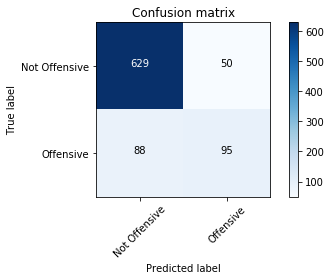

In [132]:

cn_matrix = confusion_matrix(y_test, y_pred)
print(cn_matrix)

plot_confusion_matrix(cn_matrix, ['Not Offensive', 'Offensive'])
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

In [71]:
from keras.layers import LSTM, GRU, MaxPooling1D

tweet_input = Input(shape=(max_len,), dtype='int32')

tweet_encoder = Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = MaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = MaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = MaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
lstm = LSTM(100)(merged)
lstm = Dropout(0.2)(lstm)
lstm = Dense(1)(lstm)
output = Activation('sigmoid')(lstm)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()

filepath="CNN_LSTM_W2V_best_weights.{epoch:02d}-{val_acc:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')

model.fit(x_train_seq, y_train, batch_size=32, epochs=10, validation_split = 0.2, callbacks = [checkpoint])

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 57)           0                                            
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 57, 200)      4000000     input_17[0][0]                   
__________________________________________________________________________________________________
conv1d_32 (Conv1D)              (None, 56, 100)      40100       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_33 (Conv1D)              (None, 55, 100)      60100       embedding_14[0][0]               
__________________________________________________________________________________________________
conv1d_34 

 6656/10586 [=================>............] - ETA: 1:28 - loss: 0.5295 - acc: 0.812 - ETA: 1:28 - loss: 0.4643 - acc: 0.812 - ETA: 1:33 - loss: 0.4780 - acc: 0.791 - ETA: 1:34 - loss: 0.4601 - acc: 0.796 - ETA: 1:34 - loss: 0.4517 - acc: 0.800 - ETA: 1:35 - loss: 0.4554 - acc: 0.796 - ETA: 1:36 - loss: 0.4306 - acc: 0.808 - ETA: 1:37 - loss: 0.4393 - acc: 0.808 - ETA: 1:37 - loss: 0.4403 - acc: 0.805 - ETA: 1:38 - loss: 0.4397 - acc: 0.803 - ETA: 1:38 - loss: 0.4512 - acc: 0.792 - ETA: 1:38 - loss: 0.4620 - acc: 0.786 - ETA: 1:38 - loss: 0.4549 - acc: 0.790 - ETA: 1:37 - loss: 0.4503 - acc: 0.796 - ETA: 1:37 - loss: 0.4557 - acc: 0.793 - ETA: 1:37 - loss: 0.4497 - acc: 0.794 - ETA: 1:37 - loss: 0.4520 - acc: 0.790 - ETA: 1:37 - loss: 0.4519 - acc: 0.791 - ETA: 1:37 - loss: 0.4434 - acc: 0.796 - ETA: 1:37 - loss: 0.4420 - acc: 0.798 - ETA: 1:37 - loss: 0.4527 - acc: 0.790 - ETA: 1:36 - loss: 0.4534 - acc: 0.786 - ETA: 1:36 - loss: 0.4494 - acc: 0.790 - ETA: 1:35 - loss: 0.4506 - acc: 0

10586/10586 [==============================] - ETA: 38s - loss: 0.4449 - acc: 0.79 - ETA: 37s - loss: 0.4444 - acc: 0.79 - ETA: 37s - loss: 0.4455 - acc: 0.79 - ETA: 37s - loss: 0.4450 - acc: 0.79 - ETA: 36s - loss: 0.4449 - acc: 0.79 - ETA: 36s - loss: 0.4445 - acc: 0.79 - ETA: 36s - loss: 0.4454 - acc: 0.79 - ETA: 35s - loss: 0.4451 - acc: 0.79 - ETA: 35s - loss: 0.4455 - acc: 0.79 - ETA: 35s - loss: 0.4455 - acc: 0.79 - ETA: 34s - loss: 0.4460 - acc: 0.79 - ETA: 34s - loss: 0.4460 - acc: 0.79 - ETA: 34s - loss: 0.4466 - acc: 0.79 - ETA: 33s - loss: 0.4466 - acc: 0.79 - ETA: 33s - loss: 0.4470 - acc: 0.79 - ETA: 33s - loss: 0.4468 - acc: 0.79 - ETA: 33s - loss: 0.4460 - acc: 0.79 - ETA: 32s - loss: 0.4464 - acc: 0.79 - ETA: 32s - loss: 0.4470 - acc: 0.79 - ETA: 32s - loss: 0.4472 - acc: 0.79 - ETA: 31s - loss: 0.4469 - acc: 0.79 - ETA: 31s - loss: 0.4466 - acc: 0.79 - ETA: 31s - loss: 0.4466 - acc: 0.79 - ETA: 30s - loss: 0.4469 - acc: 0.79 - ETA: 30s - loss: 0.4466 - acc: 0.79 - ETA

 6624/10586 [=================>............] - ETA: 1:34 - loss: 0.1126 - acc: 0.968 - ETA: 1:38 - loss: 0.1102 - acc: 0.968 - ETA: 1:41 - loss: 0.0961 - acc: 0.979 - ETA: 1:42 - loss: 0.0934 - acc: 0.984 - ETA: 1:42 - loss: 0.0986 - acc: 0.975 - ETA: 1:41 - loss: 0.1030 - acc: 0.974 - ETA: 1:41 - loss: 0.1020 - acc: 0.973 - ETA: 1:40 - loss: 0.1111 - acc: 0.972 - ETA: 1:40 - loss: 0.1286 - acc: 0.965 - ETA: 1:40 - loss: 0.1275 - acc: 0.965 - ETA: 1:39 - loss: 0.1401 - acc: 0.957 - ETA: 1:40 - loss: 0.1350 - acc: 0.960 - ETA: 1:39 - loss: 0.1345 - acc: 0.961 - ETA: 1:39 - loss: 0.1348 - acc: 0.962 - ETA: 1:39 - loss: 0.1294 - acc: 0.964 - ETA: 1:39 - loss: 0.1320 - acc: 0.962 - ETA: 1:38 - loss: 0.1340 - acc: 0.959 - ETA: 1:38 - loss: 0.1312 - acc: 0.960 - ETA: 1:37 - loss: 0.1277 - acc: 0.962 - ETA: 1:37 - loss: 0.1235 - acc: 0.962 - ETA: 1:37 - loss: 0.1217 - acc: 0.962 - ETA: 1:36 - loss: 0.1179 - acc: 0.964 - ETA: 1:36 - loss: 0.1268 - acc: 0.959 - ETA: 1:36 - loss: 0.1262 - acc: 0

10586/10586 [==============================] - ETA: 39s - loss: 0.1162 - acc: 0.95 - ETA: 39s - loss: 0.1167 - acc: 0.95 - ETA: 38s - loss: 0.1163 - acc: 0.95 - ETA: 38s - loss: 0.1167 - acc: 0.95 - ETA: 38s - loss: 0.1174 - acc: 0.95 - ETA: 37s - loss: 0.1189 - acc: 0.95 - ETA: 37s - loss: 0.1186 - acc: 0.95 - ETA: 37s - loss: 0.1187 - acc: 0.95 - ETA: 36s - loss: 0.1192 - acc: 0.95 - ETA: 36s - loss: 0.1195 - acc: 0.95 - ETA: 36s - loss: 0.1194 - acc: 0.95 - ETA: 35s - loss: 0.1199 - acc: 0.95 - ETA: 35s - loss: 0.1198 - acc: 0.95 - ETA: 35s - loss: 0.1197 - acc: 0.95 - ETA: 34s - loss: 0.1205 - acc: 0.95 - ETA: 34s - loss: 0.1204 - acc: 0.95 - ETA: 34s - loss: 0.1203 - acc: 0.95 - ETA: 33s - loss: 0.1204 - acc: 0.95 - ETA: 33s - loss: 0.1205 - acc: 0.95 - ETA: 33s - loss: 0.1204 - acc: 0.95 - ETA: 32s - loss: 0.1202 - acc: 0.95 - ETA: 32s - loss: 0.1202 - acc: 0.95 - ETA: 32s - loss: 0.1205 - acc: 0.95 - ETA: 31s - loss: 0.1206 - acc: 0.95 - ETA: 31s - loss: 0.1206 - acc: 0.95 - ETA

 6624/10586 [=================>............] - ETA: 1:31 - loss: 0.0572 - acc: 0.968 - ETA: 1:37 - loss: 0.0461 - acc: 0.968 - ETA: 1:41 - loss: 0.0347 - acc: 0.979 - ETA: 1:40 - loss: 0.0641 - acc: 0.968 - ETA: 1:42 - loss: 0.0578 - acc: 0.975 - ETA: 1:41 - loss: 0.0491 - acc: 0.979 - ETA: 1:42 - loss: 0.0436 - acc: 0.982 - ETA: 1:42 - loss: 0.0395 - acc: 0.984 - ETA: 1:41 - loss: 0.0444 - acc: 0.982 - ETA: 1:41 - loss: 0.0426 - acc: 0.984 - ETA: 1:42 - loss: 0.0392 - acc: 0.985 - ETA: 1:41 - loss: 0.0368 - acc: 0.987 - ETA: 1:41 - loss: 0.0400 - acc: 0.985 - ETA: 1:41 - loss: 0.0408 - acc: 0.984 - ETA: 1:41 - loss: 0.0399 - acc: 0.985 - ETA: 1:40 - loss: 0.0381 - acc: 0.986 - ETA: 1:40 - loss: 0.0362 - acc: 0.987 - ETA: 1:40 - loss: 0.0365 - acc: 0.986 - ETA: 1:39 - loss: 0.0361 - acc: 0.985 - ETA: 1:39 - loss: 0.0345 - acc: 0.985 - ETA: 1:38 - loss: 0.0330 - acc: 0.986 - ETA: 1:38 - loss: 0.0332 - acc: 0.987 - ETA: 1:38 - loss: 0.0325 - acc: 0.987 - ETA: 1:37 - loss: 0.0318 - acc: 0

10586/10586 [==============================] - ETA: 38s - loss: 0.0288 - acc: 0.99 - ETA: 38s - loss: 0.0287 - acc: 0.99 - ETA: 38s - loss: 0.0290 - acc: 0.99 - ETA: 38s - loss: 0.0295 - acc: 0.99 - ETA: 37s - loss: 0.0299 - acc: 0.99 - ETA: 37s - loss: 0.0298 - acc: 0.99 - ETA: 37s - loss: 0.0298 - acc: 0.99 - ETA: 36s - loss: 0.0297 - acc: 0.99 - ETA: 36s - loss: 0.0296 - acc: 0.99 - ETA: 36s - loss: 0.0296 - acc: 0.99 - ETA: 35s - loss: 0.0297 - acc: 0.99 - ETA: 35s - loss: 0.0296 - acc: 0.99 - ETA: 35s - loss: 0.0295 - acc: 0.99 - ETA: 34s - loss: 0.0296 - acc: 0.99 - ETA: 34s - loss: 0.0299 - acc: 0.99 - ETA: 34s - loss: 0.0299 - acc: 0.99 - ETA: 33s - loss: 0.0299 - acc: 0.99 - ETA: 33s - loss: 0.0297 - acc: 0.99 - ETA: 33s - loss: 0.0296 - acc: 0.99 - ETA: 32s - loss: 0.0295 - acc: 0.99 - ETA: 32s - loss: 0.0294 - acc: 0.99 - ETA: 32s - loss: 0.0293 - acc: 0.99 - ETA: 31s - loss: 0.0292 - acc: 0.99 - ETA: 31s - loss: 0.0292 - acc: 0.99 - ETA: 31s - loss: 0.0296 - acc: 0.99 - ETA

 6624/10586 [=================>............] - ETA: 1:28 - loss: 0.0397 - acc: 0.968 - ETA: 1:31 - loss: 0.0205 - acc: 0.984 - ETA: 1:38 - loss: 0.0153 - acc: 0.989 - ETA: 1:40 - loss: 0.0124 - acc: 0.992 - ETA: 1:39 - loss: 0.0115 - acc: 0.993 - ETA: 1:40 - loss: 0.0099 - acc: 0.994 - ETA: 1:40 - loss: 0.0101 - acc: 0.995 - ETA: 1:40 - loss: 0.0129 - acc: 0.992 - ETA: 1:40 - loss: 0.0134 - acc: 0.993 - ETA: 1:40 - loss: 0.0128 - acc: 0.993 - ETA: 1:39 - loss: 0.0179 - acc: 0.991 - ETA: 1:39 - loss: 0.0247 - acc: 0.989 - ETA: 1:40 - loss: 0.0234 - acc: 0.990 - ETA: 1:40 - loss: 0.0223 - acc: 0.991 - ETA: 1:39 - loss: 0.0209 - acc: 0.991 - ETA: 1:38 - loss: 0.0204 - acc: 0.992 - ETA: 1:38 - loss: 0.0237 - acc: 0.989 - ETA: 1:38 - loss: 0.0226 - acc: 0.989 - ETA: 1:38 - loss: 0.0223 - acc: 0.990 - ETA: 1:38 - loss: 0.0214 - acc: 0.990 - ETA: 1:38 - loss: 0.0205 - acc: 0.991 - ETA: 1:37 - loss: 0.0197 - acc: 0.991 - ETA: 1:37 - loss: 0.0190 - acc: 0.991 - ETA: 1:37 - loss: 0.0185 - acc: 0

10586/10586 [==============================] - ETA: 38s - loss: 0.0138 - acc: 0.99 - ETA: 38s - loss: 0.0138 - acc: 0.99 - ETA: 38s - loss: 0.0139 - acc: 0.99 - ETA: 38s - loss: 0.0139 - acc: 0.99 - ETA: 37s - loss: 0.0138 - acc: 0.99 - ETA: 37s - loss: 0.0138 - acc: 0.99 - ETA: 37s - loss: 0.0137 - acc: 0.99 - ETA: 36s - loss: 0.0137 - acc: 0.99 - ETA: 36s - loss: 0.0136 - acc: 0.99 - ETA: 36s - loss: 0.0139 - acc: 0.99 - ETA: 35s - loss: 0.0138 - acc: 0.99 - ETA: 35s - loss: 0.0138 - acc: 0.99 - ETA: 35s - loss: 0.0142 - acc: 0.99 - ETA: 34s - loss: 0.0142 - acc: 0.99 - ETA: 34s - loss: 0.0143 - acc: 0.99 - ETA: 34s - loss: 0.0143 - acc: 0.99 - ETA: 33s - loss: 0.0142 - acc: 0.99 - ETA: 33s - loss: 0.0142 - acc: 0.99 - ETA: 33s - loss: 0.0142 - acc: 0.99 - ETA: 32s - loss: 0.0142 - acc: 0.99 - ETA: 32s - loss: 0.0141 - acc: 0.99 - ETA: 32s - loss: 0.0141 - acc: 0.99 - ETA: 31s - loss: 0.0141 - acc: 0.99 - ETA: 31s - loss: 0.0140 - acc: 0.99 - ETA: 31s - loss: 0.0141 - acc: 0.99 - ETA

 6624/10586 [=================>............] - ETA: 1:39 - loss: 4.1121e-04 - acc: 1.000 - ETA: 1:43 - loss: 7.3609e-04 - acc: 1.000 - ETA: 1:44 - loss: 0.0021 - acc: 1.0000    - ETA: 1:45 - loss: 0.0019 - acc: 1.000 - ETA: 1:46 - loss: 0.0017 - acc: 1.000 - ETA: 1:45 - loss: 0.0016 - acc: 1.000 - ETA: 1:45 - loss: 0.0018 - acc: 1.000 - ETA: 1:45 - loss: 0.0017 - acc: 1.000 - ETA: 1:44 - loss: 0.0016 - acc: 1.000 - ETA: 1:44 - loss: 0.0017 - acc: 1.000 - ETA: 1:43 - loss: 0.0016 - acc: 1.000 - ETA: 1:43 - loss: 0.0015 - acc: 1.000 - ETA: 1:42 - loss: 0.0014 - acc: 1.000 - ETA: 1:42 - loss: 0.0017 - acc: 1.000 - ETA: 1:42 - loss: 0.0016 - acc: 1.000 - ETA: 1:42 - loss: 0.0072 - acc: 0.998 - ETA: 1:41 - loss: 0.0070 - acc: 0.998 - ETA: 1:41 - loss: 0.0067 - acc: 0.998 - ETA: 1:41 - loss: 0.0067 - acc: 0.998 - ETA: 1:41 - loss: 0.0064 - acc: 0.998 - ETA: 1:41 - loss: 0.0061 - acc: 0.998 - ETA: 1:40 - loss: 0.0058 - acc: 0.998 - ETA: 1:40 - loss: 0.0056 - acc: 0.998 - ETA: 1:39 - loss: 0.0

10586/10586 [==============================] - ETA: 39s - loss: 0.0116 - acc: 0.99 - ETA: 38s - loss: 0.0120 - acc: 0.99 - ETA: 38s - loss: 0.0120 - acc: 0.99 - ETA: 38s - loss: 0.0120 - acc: 0.99 - ETA: 37s - loss: 0.0119 - acc: 0.99 - ETA: 37s - loss: 0.0119 - acc: 0.99 - ETA: 37s - loss: 0.0120 - acc: 0.99 - ETA: 36s - loss: 0.0120 - acc: 0.99 - ETA: 36s - loss: 0.0119 - acc: 0.99 - ETA: 36s - loss: 0.0119 - acc: 0.99 - ETA: 35s - loss: 0.0119 - acc: 0.99 - ETA: 35s - loss: 0.0118 - acc: 0.99 - ETA: 35s - loss: 0.0118 - acc: 0.99 - ETA: 35s - loss: 0.0117 - acc: 0.99 - ETA: 34s - loss: 0.0119 - acc: 0.99 - ETA: 34s - loss: 0.0119 - acc: 0.99 - ETA: 34s - loss: 0.0119 - acc: 0.99 - ETA: 33s - loss: 0.0119 - acc: 0.99 - ETA: 33s - loss: 0.0123 - acc: 0.99 - ETA: 33s - loss: 0.0122 - acc: 0.99 - ETA: 32s - loss: 0.0122 - acc: 0.99 - ETA: 32s - loss: 0.0122 - acc: 0.99 - ETA: 32s - loss: 0.0121 - acc: 0.99 - ETA: 31s - loss: 0.0121 - acc: 0.99 - ETA: 31s - loss: 0.0121 - acc: 0.99 - ETA

In [133]:
loaded_CNN_model = load_model('CNN_LSTM_W2V_best_weights.02-0.7594.hdf5')
loaded_CNN_model.evaluate(x=X_test_seq, y=y_test)

862/862 [==============================] - ETA: 20 - ETA: 11 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 5s 6ms/step


[0.4381235528158201, 0.8062645006069175]

[[602  77]
 [ 90  93]]
Confusion matrix, without normalization
[[602  77]
 [ 90  93]]
0.7025516413444829


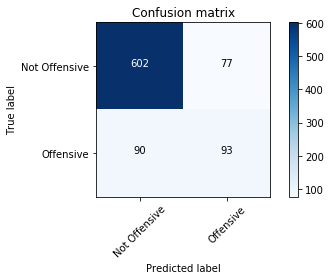

In [134]:
yhat_cnn = loaded_CNN_model.predict(X_test_seq)

y_pred = (yhat_cnn > 0.5)
cn_matrix = confusion_matrix(y_test, y_pred)
print(cn_matrix)

plot_confusion_matrix(cn_matrix, ['Not Offensive', 'Offensive'])
print(f1_score(y_true=y_test, y_pred=y_pred, average='macro'))

In [ ]:
from keras.layers import LSTM, GRU, MaxPooling1D

tweet_input = Input(shape=(max_len,), dtype='int32')

tweet_encoder = Embedding(ggl_num_words, ggl_embedding_dimension, weights=[ggl_embedding_matrix], input_length=max_len, trainable=True)(tweet_input)
bigram_branch = Conv1D(filters=100, kernel_size=2, padding='valid', activation='relu', strides=1)(tweet_encoder)
bigram_branch = MaxPooling1D()(bigram_branch)
trigram_branch = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', strides=1)(tweet_encoder)
trigram_branch = MaxPooling1D()(trigram_branch)
fourgram_branch = Conv1D(filters=100, kernel_size=4, padding='valid', activation='relu', strides=1)(tweet_encoder)
fourgram_branch = MaxPooling1D()(fourgram_branch)
merged = concatenate([bigram_branch, trigram_branch, fourgram_branch], axis=1)
lstm = LSTM(100)(merged)
lstm = Dropout(0.2)(lstm)
lstm = Dense(1)(lstm)
output = Activation('sigmoid')(lstm)
model = Model(inputs=[tweet_input], outputs=[output])
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
model.summary()